In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

# Outliers using Zscore

In [8]:
df=sns.load_dataset('tips')

In [9]:
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


<Axes: >

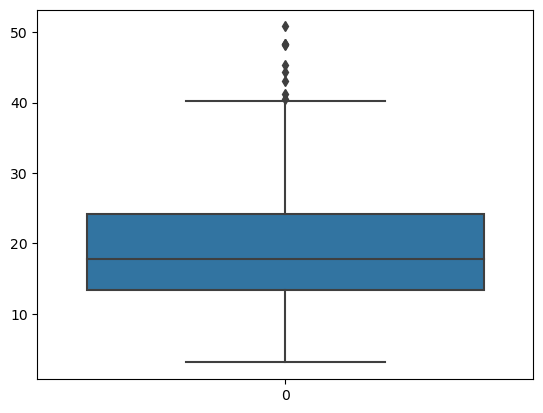

In [10]:
sns.boxplot(df['total_bill'])

In [11]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [22]:
Outliers_total_bill =[]

In [23]:
def detectoutliers(data):
    threshold=3  # defines third standard deviation
    mean=np.mean(data)
    std=np.std(data)
    
    for i in data:
        Zscore=(i-mean)/std
        if np.abs(Zscore) > threshold:
            Outliers_total_bill.append(i)
    
    return Outliers_total_bill

In [27]:
df_total_bills=df['total_bill']

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <BarContainer object of 10 artists>)

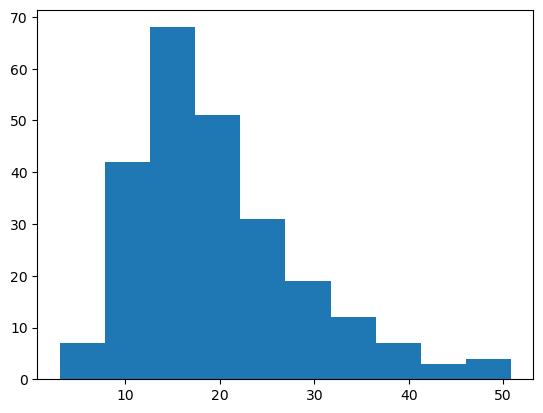

In [28]:
plt.hist(df_total_bills)

In [29]:
detectoutliers(df_total_bills)

[48.27, 48.17, 50.81, 48.33, 48.27, 48.17, 50.81, 48.33]

.

In [30]:
#  Just like this lets find outlies of another tables 

In [31]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [36]:
df_tip=df['tip']
df_size=df['size']

<Axes: >

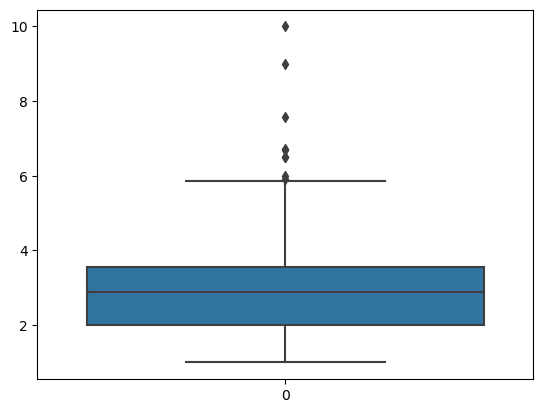

In [37]:
sns.boxplot(df_tip)

<Axes: >

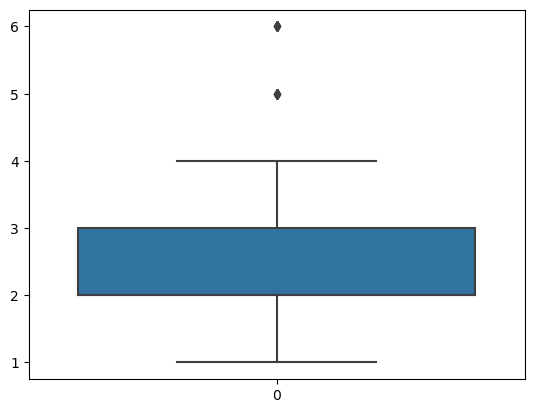

In [38]:
sns.boxplot(df_size)

In [39]:
# Handle these outliers

# 

# IQR 

In [42]:
# Interquartile range
# min  25% median 75% max
# lower fence and higher fence 

In [44]:
# steps:
#     1 sort data
#     2 calculate Q1 and Q3
#     3 IQR (Q3-Q1)
#     4 find lower fence (Q1-1.5*(IQR) )
#     5 Find higher fence (Q3+1.5*(IQR))

In [45]:
df_total_bills=sorted(df_total_bills)
df_total_bills

[3.07,
 5.75,
 7.25,
 7.25,
 7.51,
 7.56,
 7.74,
 8.35,
 8.51,
 8.52,
 8.58,
 8.77,
 9.55,
 9.6,
 9.68,
 9.78,
 9.94,
 10.07,
 10.07,
 10.09,
 10.27,
 10.29,
 10.33,
 10.33,
 10.34,
 10.34,
 10.51,
 10.59,
 10.63,
 10.65,
 10.77,
 11.02,
 11.17,
 11.24,
 11.35,
 11.38,
 11.59,
 11.61,
 11.69,
 11.87,
 12.02,
 12.03,
 12.16,
 12.26,
 12.43,
 12.46,
 12.48,
 12.54,
 12.6,
 12.66,
 12.69,
 12.74,
 12.76,
 12.9,
 13.0,
 13.0,
 13.03,
 13.13,
 13.16,
 13.27,
 13.28,
 13.37,
 13.39,
 13.42,
 13.42,
 13.42,
 13.51,
 13.81,
 13.81,
 13.94,
 14.0,
 14.07,
 14.15,
 14.26,
 14.31,
 14.48,
 14.52,
 14.73,
 14.78,
 14.83,
 15.01,
 15.04,
 15.06,
 15.36,
 15.38,
 15.42,
 15.48,
 15.53,
 15.69,
 15.69,
 15.77,
 15.81,
 15.95,
 15.98,
 15.98,
 16.0,
 16.04,
 16.21,
 16.27,
 16.29,
 16.31,
 16.32,
 16.4,
 16.43,
 16.45,
 16.47,
 16.49,
 16.58,
 16.66,
 16.82,
 16.93,
 16.97,
 16.99,
 17.07,
 17.26,
 17.29,
 17.31,
 17.46,
 17.47,
 17.51,
 17.59,
 17.78,
 17.81,
 17.82,
 17.89,
 17.92,
 17.92,
 18.04,
 

In [47]:
q1,q3=np.percentile(df_total_bills,[24,75])

In [48]:
print(q1,q3)

13.1952 24.127499999999998


In [49]:
# find lower fence and higher fence 

In [50]:
iqr=q3-q1

In [51]:
lower_fence=q1-(1.5*iqr)
higher_fence=q3+(1.5*iqr)

In [53]:
print(lower_fence)
print(higher_fence)

-3.203249999999997
40.525949999999995


In [59]:
# df['total_bill'].describe()

# 